# Example of using RadioData for training/evaluation
---


## Table of Contents

1. [Data generator for training CFO Correction Network](#cfo_data_generator)
2. [Data generator for training Equalization](#equalization)
3. [Data generator for training Demod + Decoder](#decoder)
4. [Data generator for training End to End](#end2end)

## Environment setup

In [1]:
# Import packages from other direction. Itis necessary if the project is structured as:
# my_project
# ├── notebooks
# │   └── Generate Radio Data for tr.ipynb
# ├── local_python_package
# │   ├── __init__.py
# │   ├── models.py
# ├── README.md
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import multiprocessing as mp
from radioml.dataset import RadioData

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
sns.set_style("white")

## Define Parameters

In [3]:
NUM_PACKETS  = 10
PREABMLE_LEN = 40
DATA_LEN     = 200

OMEGA      = 1/50
SNR_train  = 10.0 

## Data generator for training CFO Correction  <a class="anchor" id="cfo_data_generator"></a>


In [4]:
%%time
radio = RadioData(DATA_LEN, PREABMLE_LEN, 
                  channels_len=1,
                  modulation_scheme='QPSK')

generator = radio.cfo_correction_data_gen(OMEGA, SNR_train, batch_size=32)
for i in range(3):
    one_batch = next(generator)
    [preambles, preambles_conv], omegas = one_batch

CPU times: user 7.94 ms, sys: 25.8 ms, total: 33.8 ms
Wall time: 266 ms


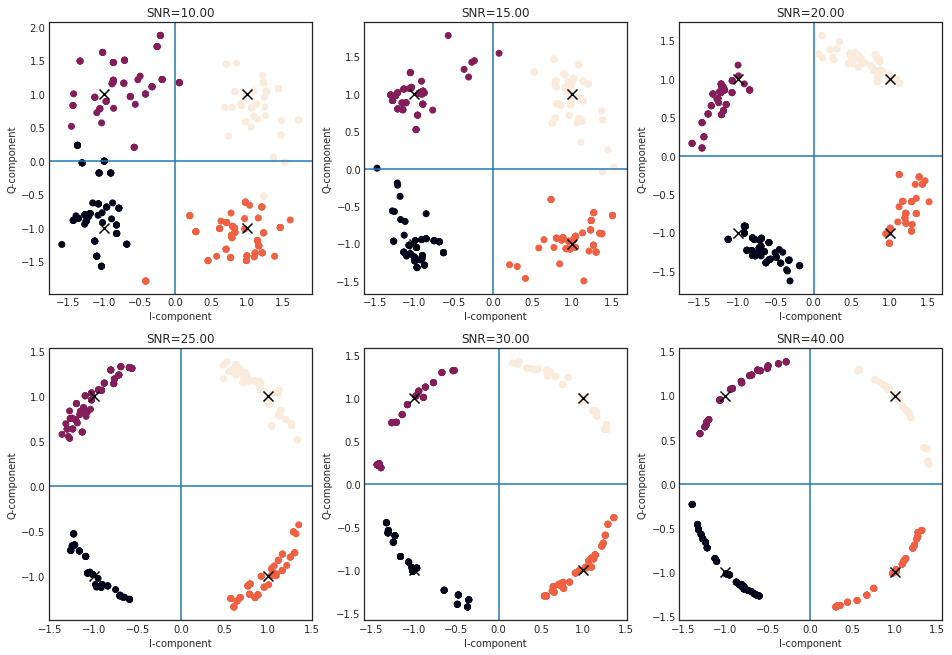

In [5]:
## Visualize data
SNRs = [10.0, 15.0, 20.0, 25.0, 30.0, 40.0]

_, axes = plt.subplots(len(SNRs) //3, 3, figsize=(16, 11))
axes = axes.flatten()

for i, snr in enumerate(SNRs):
    ax = axes[i]
    [preambles, preambles_conv], omegas = next(radio.cfo_correction_data_gen(OMEGA, snr, batch_size=8))
    symbols, groundtruths = np.unique(preambles.view(np.complex),return_inverse=True)

    ax.scatter(preambles_conv[...,0].flatten(),preambles_conv[...,1].flatten(), c=groundtruths)
    ax.scatter(np.real(symbols), np.imag(symbols), marker='x', s=100, color='black')
    
    ax.set_xlabel('I-component')
    ax.set_ylabel('Q-component')
    ax.set_title("SNR=%.2f" % snr)
    ax.axhline()
    ax.axvline()

## Data generator for training Equalization  <a class="anchor" id="equalization"></a>


## Data generator for training Demod + Decoder <a class="anchor" id="decoder"></a>

## Data generator for training End to End  <a class="anchor" id="end2end"></a>

In [6]:
%%time
radio = RadioData(DATA_LEN, PREABMLE_LEN, 
                  channels_len=1,
                  modulation_scheme='QPSK')

generator = radio.end2end_data_generator(OMEGA, SNR_train, batch_size=32)
for i in range(3):
    one_batch = next(generator)
    [corrupted_packets, preamble, preamble_conv], packets = one_batch

CPU times: user 17.8 ms, sys: 18.8 ms, total: 36.6 ms
Wall time: 134 ms


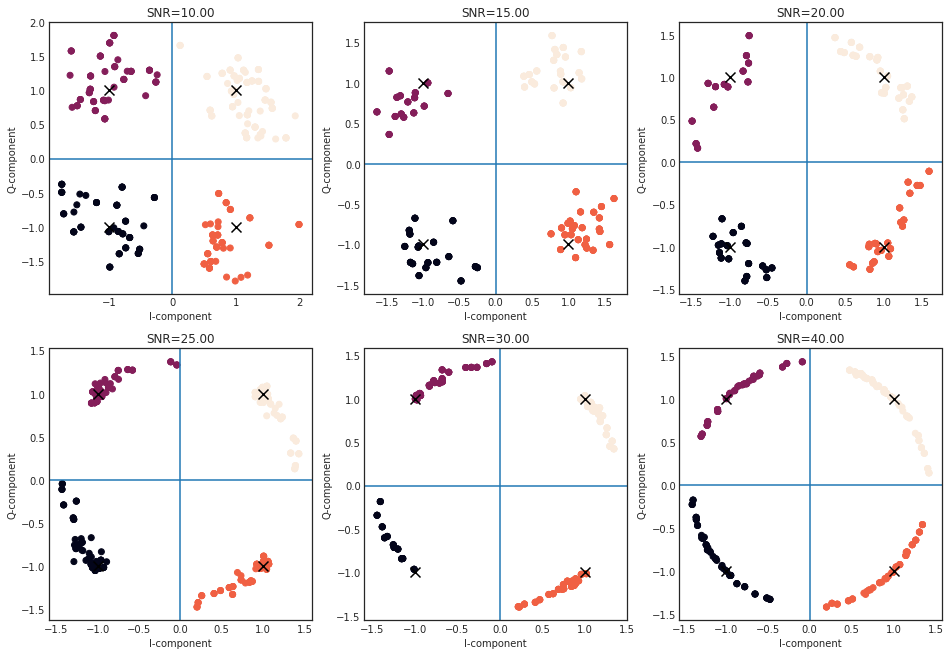

In [7]:
## Visualize data
SNRs = [10.0, 15.0, 20.0, 25.0, 30.0, 40.0]

_, axes = plt.subplots(len(SNRs) //3, 3, figsize=(16, 11))
axes = axes.flatten()

for i, snr in enumerate(SNRs):
    data_generator = radio.end2end_data_generator(OMEGA, snr, batch_size=8)
    [corrupted_packets, preambles, preambles_conv], packets = next(data_generator)
    
    symbols, groundtruths = np.unique(preambles.view(np.complex).flatten(),return_inverse=True)
    axes[i].scatter(preambles_conv[...,0].flatten(),
               preambles_conv[...,1].flatten(), c=groundtruths)
    axes[i].scatter(np.real(symbols), np.imag(symbols), marker='x', s=100, color='black')
    
    axes[i].set_xlabel('I-component')
    axes[i].set_ylabel('Q-component')
    axes[i].set_title("SNR=%.2f" % snr)
    axes[i].axhline()
    axes[i].axvline()